<h5> For this exercise we used data from the Snowy MOuntains on the border of New South Wales and Victoria as the mountains in our catchment have on average 5 snow days a year, which is unlikely to last a day. We therefore deemed it more useful to use data from a colder area of Australia, which is more likely to see snowfall. </h5>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
#df = pd.read_excel("S", skiprows= 3, usecols=[0,1,2,3,4], index_col= 0)
#df.rename(columns={'[mmd-1]': 'P Case 1/2', '[OC]': 'T Case 1/2','[mmd-1].1': 'P Case 3', '[OC].1': 'T Case 3'}, inplace=True)
df_camel = pd.read_csv('../Data/\Snowy_Mountains_Prep.csv', usecols = [2,3,4,5])
df_camel.rename(columns={'Rainfall amount (millimetres)': 'PRCP'}, inplace=True)
df_camel['time'] = pd.to_datetime(df_camel[['Year', 'Month', 'Day']])
df_camel.drop(['Day', 'Year', 'Month'], axis= 1, inplace = True)
df_camel.dropna(axis= 0, inplace=True)
df_camel.set_index('time', inplace=True)

df_temp = pd.read_csv('../Data/Snowy_Mountains_Temp.csv', usecols = [2,3,4,5])
df_temp.rename(columns={'Maximum temperature (Degree C)': 'T'}, inplace=True)
df_temp['time'] = pd.to_datetime(df_temp[['Year', 'Month', 'Day']])
df_temp.drop(['Year', 'Month', 'Day'], axis= 1, inplace = True)
df_temp.dropna(axis= 0, inplace=True)
df_temp.set_index('time', inplace=True)

df = pd.concat([df_camel,df_temp],axis = 1, join = 'inner')
df = df['2016-01-01': '2016-12-31']
df.describe()

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_33464\3655162300.py:3: SyntaxWarning: invalid escape sequence '\S'
  df_camel = pd.read_csv('../Data/\Snowy_Mountains_Prep.csv', usecols = [2,3,4,5])


,PRCP,T
count,361.000000,361.000000
mean,5.489197,8.472853
std,13.024469,6.949915
min,0.000000,-5.800000
25%,0.000000,2.500000
50%,0.200000,8.100000
75%,4.200000,13.900000
max,103.200000,24.600000


In [37]:
Er = 700 #m
Tt = 0 #C
Fm = 3 #mm C^-1 d^-1
Areas = np.array([5.1, 2.8, 2.2, 0.9])
A = np.sum(Areas)
f = Areas/A

<h1> Case 1 </h1>

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_33464\3072386070.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if T[i] <= Tt:
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_33464\3072386070.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pr = P[i]
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_33464\3072386070.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Mt = min(Swe[i-1], Fm 

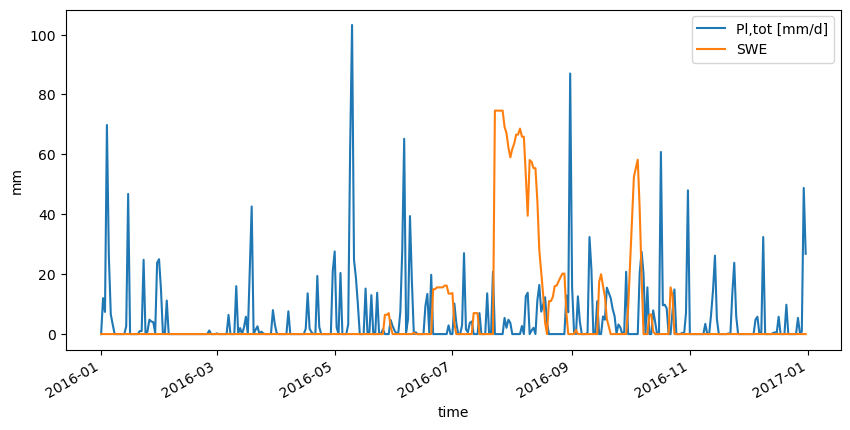

In [38]:
P = df['PRCP']
T = df['T']

Swe = np.zeros(len(P))
Pl = np.zeros(len(P))

for i in range(len(Swe)):
    if T[i] <= Tt:
        Ps = P[i]
        if i == 0:
            Swe[i] = Ps
        else:
            Swe[i] = Swe[i-1] + Ps
    else:
        Pr = P[i]
        Mt = min(Swe[i-1], Fm * (T[i] - Tt))
        Swe[i] = Swe[i-1] - Mt
        Pl[i] = Pr + Mt

df['SWE Case 1'] = Swe
df['P_l,tot Case 1'] = Pl

fig, ax = plt.subplots(figsize=(10, 5))
df['P_l,tot Case 1'].plot(ax = ax, label = 'Pl,tot [mm/d]')
df['SWE Case 1'].plot(ax = ax, label = 'SWE')
plt.legend()
#plt.xlabel('Time')
plt.ylabel('mm')
plt.show()

<h1> Case 2 </h1>

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_33464\832928925.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T_r[i,j] = T[i] - 0.6* (E_i[j] - Er) / 100
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_33464\832928925.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pr = P[i]
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_33464\832928925.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

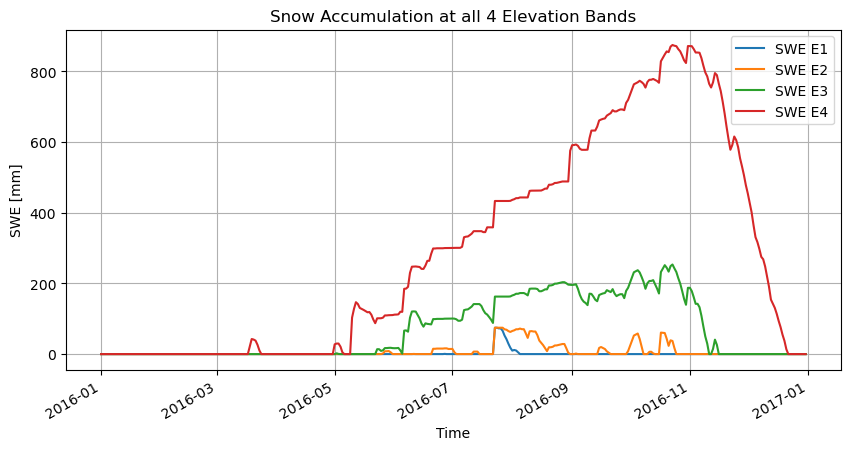

In [39]:
E_i = np.array([250, 750, 1250, 1750])
T_r = np.zeros((len(P), len(E_i)))

for i in range(len(T)):
    for j in range(len(E_i)):
        T_r[i,j] = T[i] - 0.6* (E_i[j] - Er) / 100

Swe = np.zeros((len(P), len(E_i)))
Pl = np.zeros((len(P), len(E_i)))

for i in range(len(Swe)):
    for j in range(len(E_i)):
        if T_r[i,j] <= Tt:
            Ps = P[i]
            if i == 0:
                Swe[i,j] = Ps
            else:
                Swe[i,j] = Swe[i-1,j] + Ps
        else:
            Pr = P[i]
            Mt = min(Swe[i-1,j], Fm * (T_r[i,j] - Tt))
            Swe[i,j] = Swe[i-1,j] - Mt
            Pl[i,j] = Pr + Mt

Pl_total = f[0] * Pl[:,0] + f[1] * Pl[:,1] + f[2] * Pl[:,2] + f[3]* Pl[:,3]
SWE_total = f[0] * Swe[:,0] + f[1] * Swe[:,1] + f[2] * Swe[:,2] + f[3]* Swe[:,3]

df['SWE Case 2, E1'] = Swe[:,0]
df['SWE Case 2, E2'] = Swe[:,1]
df['SWE Case 2, E3'] = Swe[:,2]
df['SWE Case 2, E4'] = Swe[:,3]
df['SWE total Case 2'] = SWE_total
df['P_l,tot Case 2'] = Pl_total

fig, ax = plt.subplots(figsize=(10, 5))
df['SWE Case 2, E1'].plot(ax = ax, label = 'SWE E1')
df['SWE Case 2, E2'].plot(ax = ax, label = 'SWE E2')
df['SWE Case 2, E3'].plot(ax = ax, label = 'SWE E3')
df['SWE Case 2, E4'].plot(ax = ax, label = 'SWE E4')
#plt.ylim(0, 1200)
plt.legend()
plt.xlabel('Time')
plt.ylabel('SWE [mm]')
plt.title('Snow Accumulation at all 4 Elevation Bands')
plt.grid()
plt.show()

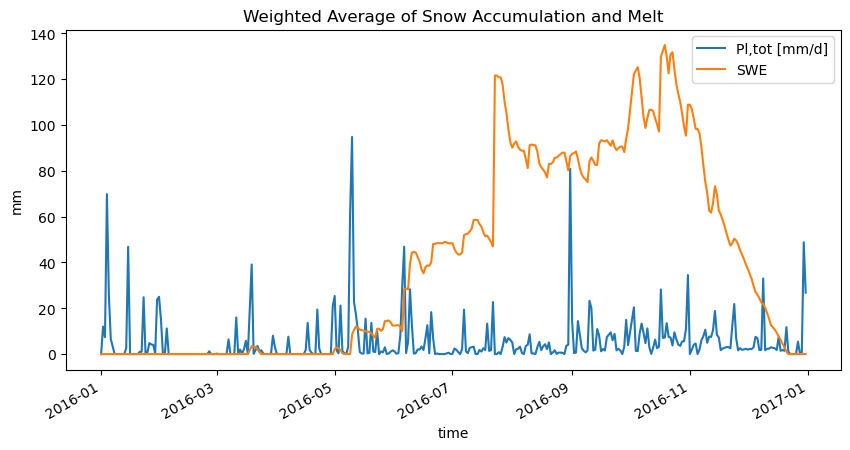

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))
df['P_l,tot Case 2'].plot(ax = ax, label = 'Pl,tot [mm/d]')
df['SWE total Case 2'].plot(ax = ax, label = 'SWE')
plt.legend()
#plt.xlabel('Time')
plt.ylabel('mm')
plt.title('Weighted Average of Snow Accumulation and Melt')
plt.show()